In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/data/VSLab/vufg/miniconda3/envs/vufg_env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/VSLab/vufg/miniconda3/envs/vufg_env/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [42]:
with open('log/record.txt', 'r') as file:
    lines = file.readlines()
    
with open('log/record_v2.txt', 'r') as file:
    lines_v2 = file.readlines()
    
lines = lines[:2200]
lines += lines_v2        

In [48]:
logs = []
for line in lines:
    pattern = re.compile(r'\d+.\d*')
    result = pattern.findall(line)
    result = [float(i) for i in result]
    logs.append(result)
    
logs = [log[1:] for log in logs]
logs = [logs[i] + logs[i + 1] for i in range(len(logs)) if i % 2 == 0 and i + 1 < len(logs)]
model_logs = [logs[i * 100: (i + 1) * 100] for i in range(len(logs) // 100)]        

model_logs = np.asarray(model_logs)
model_logs.shape

(17, 100, 4)

In [54]:
titles = ['VGG',
 'VGG_wo_bn',
 'VGG_wo_maxpool',
 'VGG_wo_relu',
 'VGG_wo_bn_relu',
 'linear_vgg',
 'linear_baseline (5 layers cnn)',
 'linear_w_maxpool',
 'linear_w_maxpool_relu',
 'linear_w_maxpool_sigmoid',
 'linear_w_maxpool_relu_bn',
 'linear_w_maxpool_relu_bn_bottleneck',
 'shallow_5_layer_cnn',
 'shallow_3_layer_cnn',
 'VGG_bottleneck_64',
 'VGG_bottleneck_16',
 'VGG_sigmoid']

# tmp = 'VGG(), VGG_wo_bn(), VGG_wo_maxpool(), VGG_wo_relu(), VGG_wo_bn_relu(), VGG_linear_1(), VGG_linear_2(), VGG_linear_3(), VGG_linear_4(), VGG_linear_5(), VGG_linear_6(), VGG_linear_7(), VGG_shallow_1(), VGG_shallow_2(), VGG_bottleneck_1(), VGG_bottleneck_2(), VGG_sigmoid'
# titles = tmp.split('(), ')
colors = ['b', 'm', 'r', 'c']

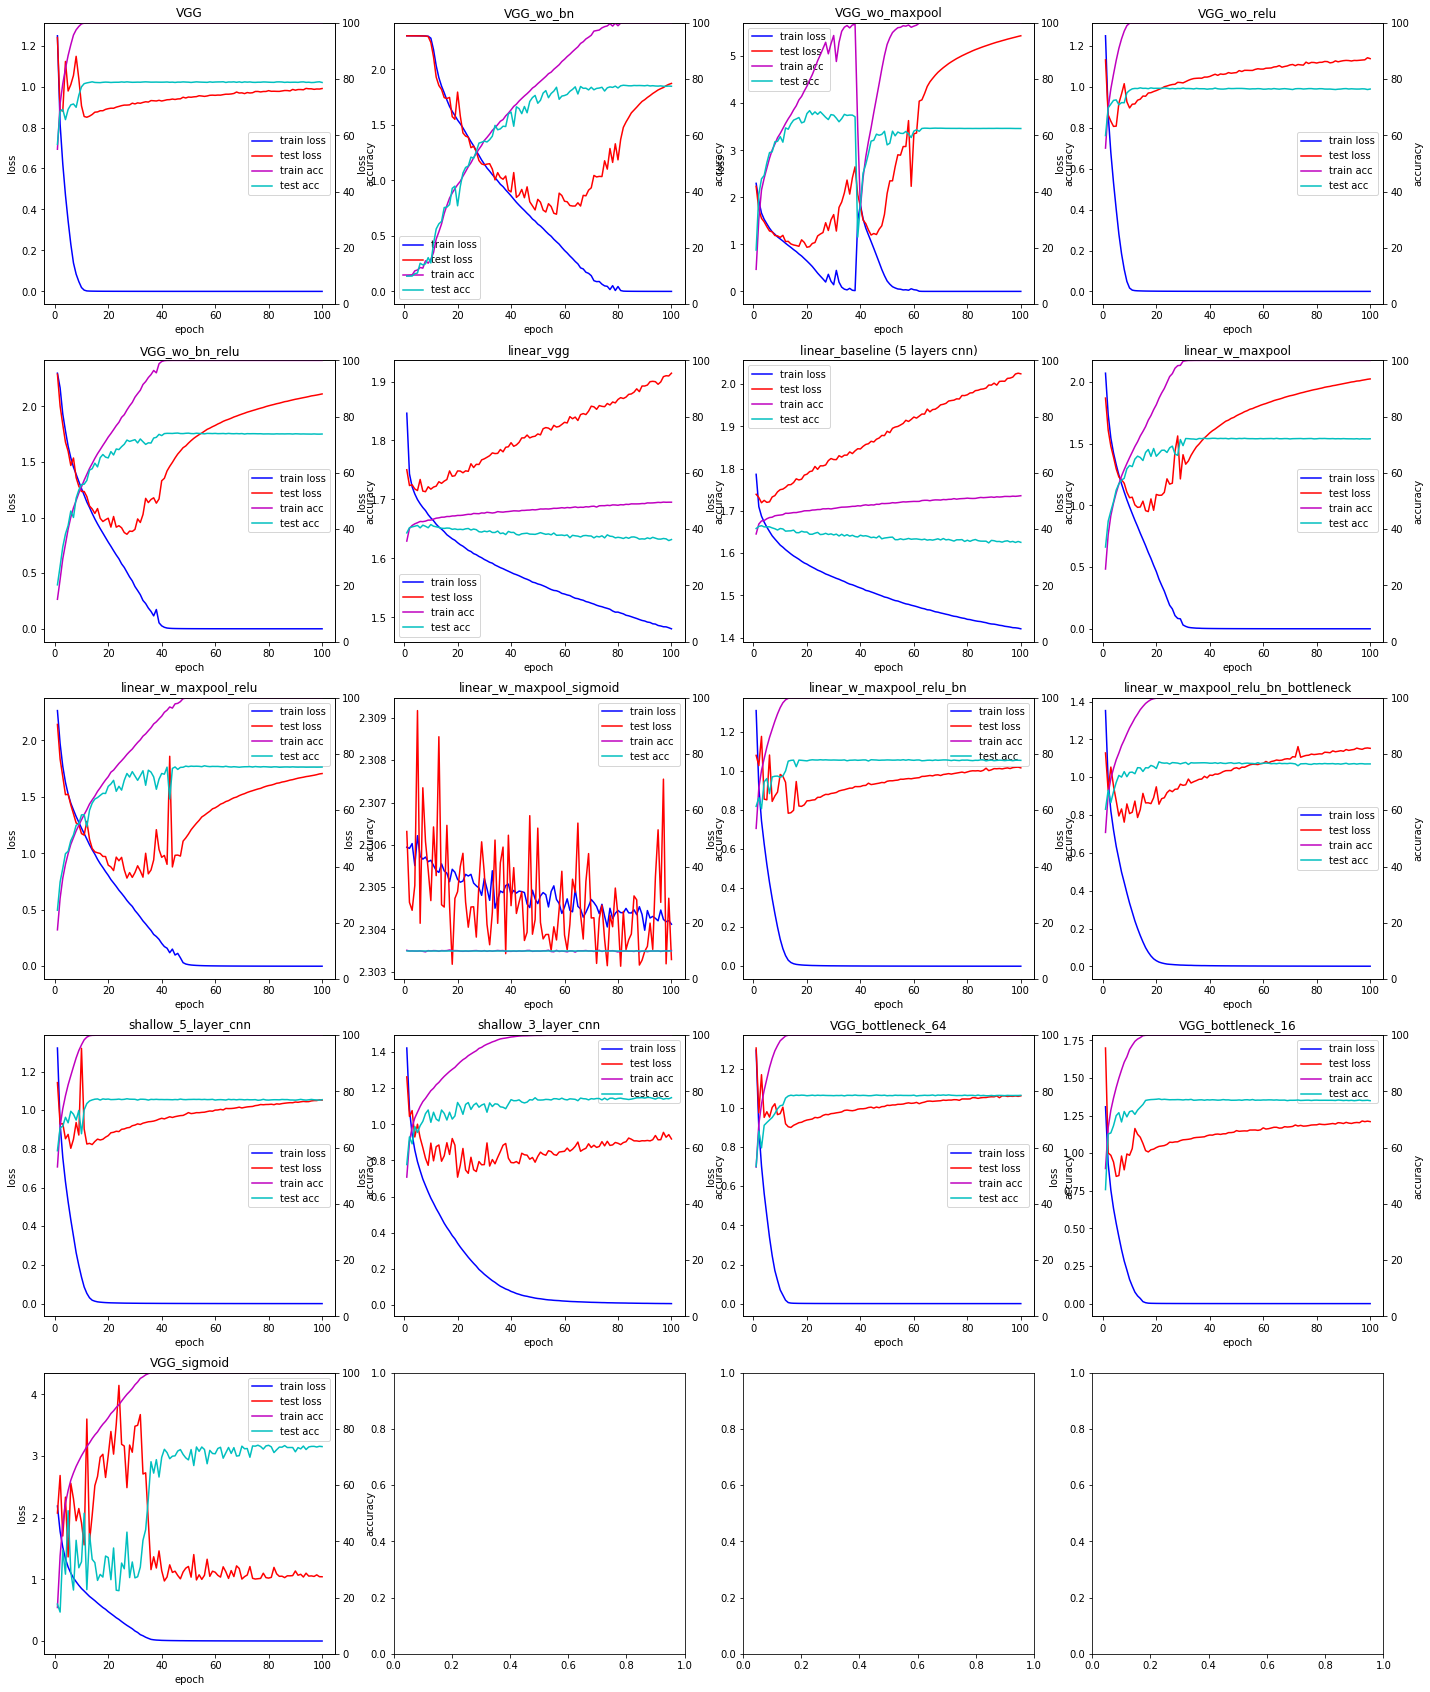

In [57]:
row_num = 5
col_num = 4
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 6, row_num * 6))
epoch = np.asarray(list(range(1, 101)))
labels = ['train loss', 'train acc', 'test loss', 'test acc']

for idx in range(model_logs.shape[0]):
    ax = axs[idx // col_num][idx % col_num]    
#     ax.set_ylim(0, 2) 
    ax2 = ax.twinx()     
    
    lns = []
    for i in range(4):
        if i % 2 == 0:
            lns += ax.plot(epoch, model_logs[idx,:,i], color=colors[i], label=labels[i])
    for i in range(4):
        if i % 2:
            lns += ax2.plot(epoch, model_logs[idx,:,i], color=colors[i], label=labels[i])
    
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs)
    
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.set_title(titles[idx])    
    ax2.set_ylabel('accuracy')
    ax2.set_ylim(0, 100)
plt.show()        